In [1]:
# Benjamin Recht
# Feb 27, 2022

import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
import matplotlib.font_manager as font_manager

myface = '#fff1e0'
myfont = 'Georgia'

def moving_average(a, n=7):
    # https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [2]:
matches=pd.read_csv('matches_adobe.csv')
matches = matches[(matches['with mandate']!='Yuma,AZ') & (matches['without mandate']!='Yuma,AZ')]
matches = matches.reset_index()  # make sure indexes pair with number of rows

cases=pd.read_csv('covid_confirmed_usafacts.csv')
populations=pd.read_csv('covid_county_population_usafacts.csv')

In [3]:
case_count_tx = np.zeros(60)
case_count_ctl = np.zeros(60)
pop_tx = 0
pop_ctl = 0
for index, row in matches.iterrows():
    
    county_name_tx=row['with mandate']
    county_name_ctl=row['without mandate']
    name_list_tx = county_name_tx.split(",")
    name_list_ctl = county_name_ctl.split(",")
    
    start_date=datetime.strptime(row['analysis window start'], '%m-%d-%Y')
    end_date=datetime.strptime(row['analysis window end'], '%m-%d-%Y')  
    date_list = pd.date_range(start=start_date,end=end_date).tolist()
    
    pop_tx+=populations[(populations['County Name']==name_list_tx[0]+' County') 
             & (populations['State']==name_list_tx[1])]['population'].iloc[0]
    
    pop_ctl+=populations[(populations['County Name']==name_list_ctl[0]+' County') 
             & (populations['State']==name_list_ctl[1])]['population'].iloc[0]
    
    idx=0
    for date in date_list:
        case_count_tx[idx]+=cases[(cases['County Name']==name_list_tx[0]+' County ') 
             & (cases['State']==name_list_tx[1])][date.strftime('%Y-%m-%d')].iloc[0]
        case_count_ctl[idx]+=cases[(cases['County Name']==name_list_ctl[0]+' County ') 
             & (cases['State']==name_list_ctl[1])][date.strftime('%Y-%m-%d')].iloc[0]
        idx+=1

tx_case_rate = moving_average(np.diff(case_count_tx)[0:56],7)/pop_tx*1e5
ctl_case_rate = moving_average(np.diff(case_count_ctl)[0:56],7)/pop_ctl*1e5

/var/folders/l8/60xntrpj1w14f9vpzldr1pxc0000gn/T/ipykernel_95590/4277366315.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks, fontname=myfont)
/var/folders/l8/60xntrpj1w14f9vpzldr1pxc0000gn/T/ipykernel_95590/4277366315.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:.0f}".format(x) for x in xticks])
/var/folders/l8/60xntrpj1w14f9vpzldr1pxc0000gn/T/ipykernel_95590/4277366315.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, fontname=myfont)
/var/folders/l8/60xntrpj1w14f9vpzldr1pxc0000gn/T/ipykernel_95590/4277366315.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:.0f}".format(y) for y in yticks])


[Text(0, 8.0, '8'),
 Text(0, 10.0, '10'),
 Text(0, 12.0, '12'),
 Text(0, 14.0, '14'),
 Text(0, 16.0, '16'),
 Text(0, 18.0, '18'),
 Text(0, 20.0, '20'),
 Text(0, 22.0, '22')]

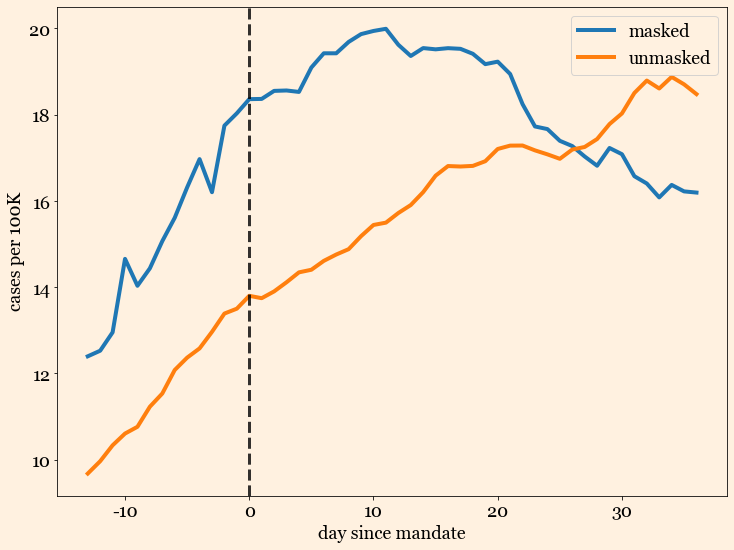

In [4]:
plt.rcParams.update({'font.size': 18})
fontprop = font_manager.FontProperties(family=myfont,style='normal')

fig = pylab.figure(figsize=(12, 9) , facecolor=myface)
ax = fig.add_subplot(1,1,1)

ax.plot(np.arange(-13,37),tx_case_rate,linewidth=4,label='masked')
ax.plot(np.arange(-13,37),ctl_case_rate,linewidth=4,label='unmasked')

ax.axvline(x=0, linestyle='--', color='k', linewidth=3, alpha=0.8)

ax.set_facecolor(myface)

ax.legend(facecolor=myface,prop=fontprop)
plt.xlabel('day since mandate',fontname=myfont)
plt.ylabel('cases per 100K',fontname=myfont)

xticks = ax.get_xticks()
ax.set_xticklabels(xticks, fontname=myfont)
ax.set_xticklabels(["{:.0f}".format(x) for x in xticks])

yticks = ax.get_yticks()
ax.set_yticklabels(yticks, fontname=myfont)
ax.set_yticklabels(["{:.0f}".format(y) for y in yticks])